## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="left", on =["Mouse ID", "Mouse ID"])
# Display the data table for preview
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
meeces = len(merged_data["Mouse ID"].unique())
meeces


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
filter_df = merged_data.duplicated(subset =['Mouse ID', 'Timepoint'])
dupes_df = merged_data[filter_df]
dupes_df


#drugs = merged_clean["Drug Regimen"].unique()

#merged_clean.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#please refer to last box where all requirements were achieved in one step
#Duplicate Mouse ID is G989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_clean = merged_data.drop(merged_data[merged_data['Mouse ID'] == 'g989' ].index)
merged_clean.to_excel("merged_clean.xlsx")


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_meeces = len(merged_clean["Mouse ID"].unique())
clean_meeces

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen


regimen_df = merged_clean.groupby('Drug Regimen').mean()
regimen_summary = regimen_df[['Tumor Volume (mm3)']]

regimen_df = merged_clean.groupby('Drug Regimen').median()
regimen_summary["Median"] = regimen_df[['Tumor Volume (mm3)']]

regimen_df = merged_clean.groupby('Drug Regimen').var()
regimen_summary['Variance' ] = regimen_df[['Tumor Volume (mm3)']]

regimen_df = merged_clean.groupby('Drug Regimen').std()
regimen_summary['Std Dev' ] = regimen_df[['Tumor Volume (mm3)']]

regimen_df = merged_clean.groupby('Drug Regimen').sem()
regimen_summary['SEM' ] = regimen_df[['Tumor Volume (mm3)']]
regimen_summary.rename(columns={'Tumor Volume (mm3)':'Mean'})


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

regimen_sum_agg = merged_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([
    ('Mean','mean'),('Median','median'), ('Variance', 'var'),('Std Dev', 'std'),('SEM','sem')])
regimen_sum_agg


# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

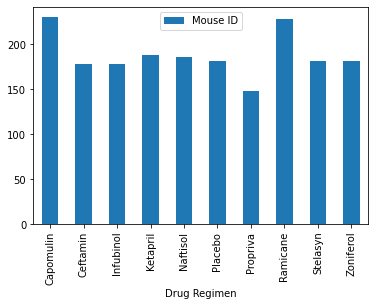

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugs_count = merged_clean.groupby("Drug Regimen").count()
#drugs_count
drugs_count.plot.bar(y = 'Mouse ID', rot=90)


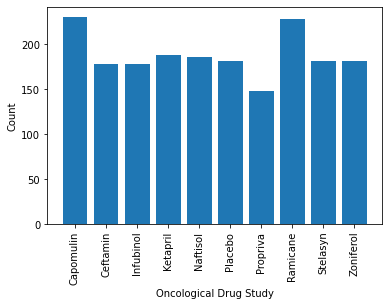

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(drugs_count.index, drugs_count['Mouse ID'])
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Oncological Drug Study")
plt.show()



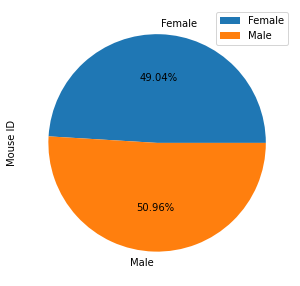

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = merged_clean.groupby("Sex").count()
sex_count.plot.pie(y='Mouse ID', figsize =(5,5), autopct='%1.2f%%')



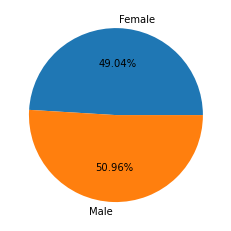

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count['Mouse ID'], labels = sex_count.index, autopct='%1.2f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol=[] #empty array to append tumor volumes into

# Start by getting the last (greatest) timepoint for each mouse
max_vol = merged_clean.groupby("Mouse ID")['Timepoint'].max()
max_vol = max_vol.reset_index() #I was recieving some erroneous results until indeces were reset.

#max_vol - let's check our data!

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge with merged_clean dataframe using 'left' so as to merge the old and new

max_vol_merge_df = max_vol.merge(merged_clean, on = ['Mouse ID', 'Timepoint'], how ='left')
max_vol_merge_df





,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#already done in last secion!

# Create empty list to fill with tumor vol data (for plotting)
#already done in last secion!

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
        # Locate the rows which contain mice on each drug and get the tumor volumes
    vol_df = max_vol_merge_df.loc[max_vol_merge_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol.append(vol_df)
    quarters = vol_df.quantile([0.25, 0.5, 0.75])
    
        
    # add subset 
    iqr = quarters[0.75] - quarters[0.25]
    
    # Determine outliers using upper and lower bounds
    lower_out = quarters[0.25] - (1.5*iqr)
    upper_out = quarters[0.75] - (1.5*iqr)
    
    outers = vol_df.loc[(vol_df < lower_out) | (vol_df > upper_out)]

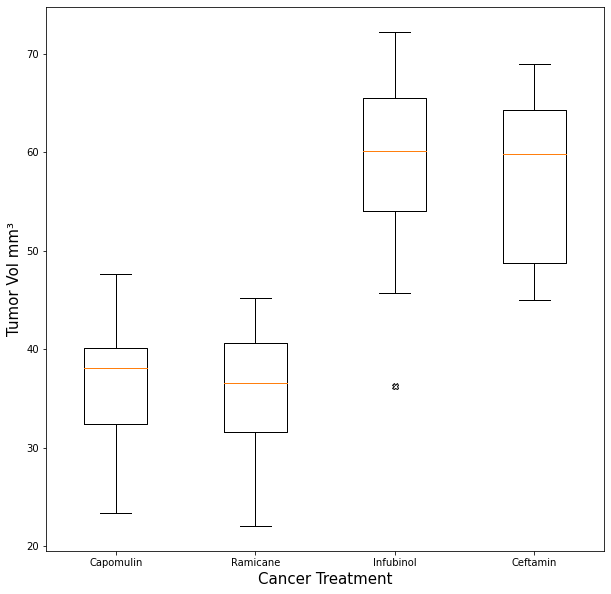

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
points =dict(marker='X', color ='red')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title = ('Tumor vol/mouse per treatment')
ax1.set_xlabel('Cancer Treatment', size=15)
ax1.set_ylabel(('Tumor Vol mm\u00b3'), size = 15)
ax1.boxplot(tumor_vol, flierprops = points)
ax1.xaxis.set(ticks=range(1, len(treatments)+1), ticklabels = treatments)
plt.show()


## Line and Scatter Plots

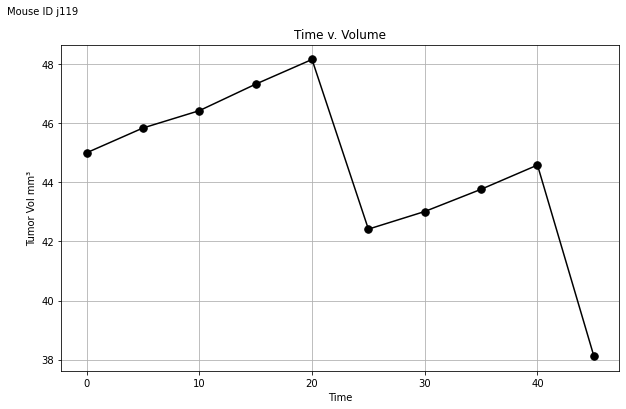

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#I created a random selection of Capomulin mice so that is not hard-coded, and a random selection of mice
mouse_list = []
cap_mouse_df = merged_clean['Drug Regimen']=='Capomulin'
cap_mouse_df = merged_clean[cap_mouse_df]
mouse_list = cap_mouse_df['Mouse ID'].unique()
mouse_list

mouse = random.choice(mouse_list)


cap_tumor = merged_clean[(merged_clean['Drug Regimen']=='Capomulin') & (merged_clean['Mouse ID'] == mouse)]

x_axis = cap_tumor['Timepoint']
y_axis = cap_tumor['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize = (10, 6)) #pardon the size, I have a bit of vision loss
plt.plot(x_axis, y_axis, marker ='.', markersize = 15, color ='black', label = 'Tumor Vol mm\u00b3')
plt.title('Time v. Volume')
plt.xlabel('Time')
plt.ylabel('Tumor Vol mm\u00b3')
plt.grid()
fig1.text(0.05, 0.95,"Mouse ID "+ mouse)
plt.show()
                                    


In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter = merged_clean[(merged_clean['Drug Regimen']=='Capomulin')]
scatter = scatter[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
groupings = scatter.groupby(['Mouse ID', 'Weight (g)'])

scatter_df = groupings['Tumor Volume (mm3)'].mean().to_frame()
scatter_df = scatter_df.reset_index()


#neil_df = scatter_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', marker ='.')
#neil_df

#scatter_df.plot.scatter(x=['Weight (g)'], y = ['Tumor Volume (mm3)'])
#plt.scatter(x_axis, y_axis,  marker ='.')
#plt.xlabel("Mouse g")
#plt.ylabel("Avg Tumor  Vol mm\u00b3")
#plt.grid()
#plt.show()

TypeError: incompatible index of inserted column with frame index

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corl = sts.pearsonr(scatter_df['Weight (g)'], scatter_df['Tumor Volume '])
print (corl)

NameError: name 'scatter_df' is not defined